# 08.수치형 자료 분석
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

## 1.package 설치

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats          # 통계분석 package
from scipy.stats import iqr

In [2]:
# 기본세팅
# 에러화면 세팅
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
online_df = pd.read_csv('07.online.csv', encoding="cp949")
online_df.head(10)

,id,sex,school,age,design,flow
0,1,1,1,18,1.231512,2.063943
1,2,2,3,23,0.700397,-0.338688
2,3,1,3,23,-0.194993,0.750929
3,4,2,2,20,1.201798,-2.202339
4,5,1,4,22,0.144357,-0.175068
5,6,1,4,24,-0.825783,-0.338688
6,7,1,2,21,-0.447367,0.750929
7,8,2,1,60,-1.099301,-3.291956
8,9,2,2,25,0.334876,-0.338688
9,10,1,3,20,-1.665145,-1.112722


### 2.2 자료구조 살펴보기

In [4]:
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      175 non-null    int64  
 1   sex     175 non-null    int64  
 2   school  175 non-null    int64  
 3   age     175 non-null    int64  
 4   design  175 non-null    float64
 5   flow    175 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 8.3 KB


In [5]:
online_df.shape

(175, 6)

In [6]:
online_df.dtypes

id          int64
sex         int64
school      int64
age         int64
design    float64
flow      float64
dtype: object

### 2.3 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [7]:
online_df['sex'] = online_df['sex'].replace ([1,2], ['남자','여자'])
online_df['school'].replace({1:'고졸이하', 2:'고졸', 3:'대학생',4: '대졸이상' }, inplace=True)

online_df.head()

,id,sex,school,age,design,flow
0,1,남자,고졸이하,18,1.231512,2.063943
1,2,여자,대학생,23,0.700397,-0.338688
2,3,남자,대학생,23,-0.194993,0.750929
3,4,여자,고졸,20,1.201798,-2.202339
4,5,남자,대졸이상,22,0.144357,-0.175068


In [8]:
online_df.dtypes

id          int64
sex        object
school     object
age         int64
design    float64
flow      float64
dtype: object

In [9]:
# datatype을 categroy로 변경
online_df['sex'] = online_df['sex'].astype('category')
online_df['school'] = online_df['school'].astype('category')

In [10]:
online_df.dtypes

id           int64
sex       category
school    category
age          int64
design     float64
flow       float64
dtype: object

## 3.범주형 자료를 분석하세요.

### Q1.나이(age)의 기초통계분석(rstatix), 히스토그램(bins=10), 상자도표

In [11]:
# table로 저장
age_df = pd.DataFrame(online_df.age.describe()).T
age_df["skew"] = online_df.age.skew()
age_df["kurtosis"] = online_df.age.kurtosis()
age_df

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,175.0,28.565714,9.462265,17.0,21.5,26.0,34.0,60.0,1.143347,0.926096


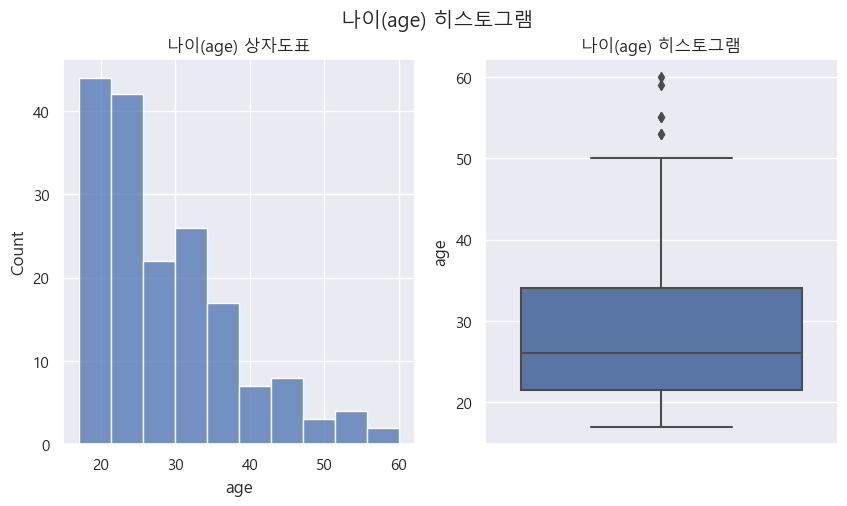

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("나이(age) 히스토그램")
sns.histplot(x = "age",
             data = online_df,
             ax = ax[0])
ax[0].set(title = "나이(age) 상자도표")
sns.boxplot(y = "age",
            data = online_df,
            ax = ax[1])
ax[1].set(title = "나이(age) 히스토그램")
plt.show()

### Q2.age의 이상치 제거(±3.0 이상만 제거)

In [13]:
print(np.where(online_df['age'] > 50))

(array([  7,  10,  16,  82,  86, 147], dtype=int64),)


In [14]:
# IRQ 및 outlier 확인
# IQR = Q3 - Q1
# from scipy.stats import iqr
q1 = online_df['age'].quantile(0.25)
q3 = online_df['age'].quantile(0.75)

iqr = iqr(online_df['age'])

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(iqr)
print(lower)
print(upper)

12.5
2.75
52.75


In [15]:
# 이상치 확인
upper_array = np.where(online_df['age'] >= upper)[0]
lower_array = np.where(online_df['age'] <= lower)[0]
print(upper_array)
print(lower_array)

[  7  10  16  82  86 147]
[]


In [16]:
# 이상치 제거
online_df.drop(index = upper_array, inplace = True)
online_df.drop(index = lower_array, inplace = True)

In [17]:
online_df.shape

(169, 6)

### Q3.age를 범주형으로 변환(10대, 20대, 30대 등으로 구분)
- 예제: 50세
- [ : <= , >=
- ( : < , >
- right = False: 45 <= x < 50 (~미만) [50, 55)
- right = True(default): 45 < x <= 50 (~이하) (45, 50]

In [18]:
online_df.age.max()

50

In [19]:
bins = [0, 20, 30, 40, 60]
label = ["~20미만", "20~30미만", "30~40미만", "40이상~"]
online_df['age_c'] = pd.cut(x = online_df['age'], 
                            bins = bins,
                            labels = label,
                            right = False)
online_df.head(10)

,id,sex,school,age,design,flow,age_c
0,1,남자,고졸이하,18,1.231512,2.063943,~20미만
1,2,여자,대학생,23,0.700397,-0.338688,20~30미만
2,3,남자,대학생,23,-0.194993,0.750929,20~30미만
3,4,여자,고졸,20,1.201798,-2.202339,20~30미만
4,5,남자,대졸이상,22,0.144357,-0.175068,20~30미만
5,6,남자,대졸이상,24,-0.825783,-0.338688,20~30미만
6,7,남자,고졸,21,-0.447367,0.750929,20~30미만
8,9,여자,고졸,25,0.334876,-0.338688,20~30미만
9,10,남자,대학생,20,-1.665145,-1.112722,20~30미만
11,12,여자,고졸,30,-0.343561,0.750929,30~40미만


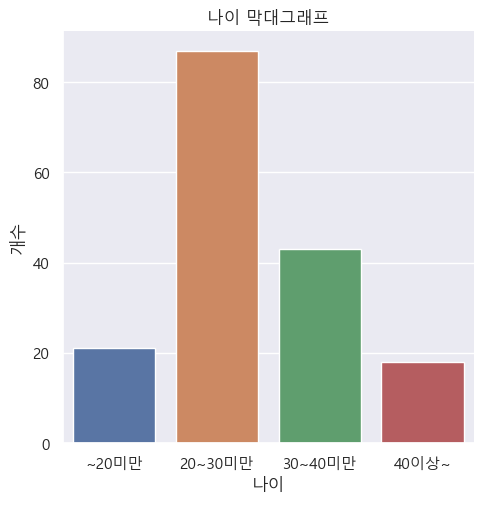

In [20]:
# 범주형 변수(막대그래프)
g = sns.catplot(data = online_df,
                x = "age_c",
                kind = "count")
g.set(title = "나이 막대그래프",
      xlabel = "나이",
      ylabel = "개수")
plt.show()

### Q4.성별에 따른 age의 점수를 구하고, histgram, box plot 그리기

In [21]:
online_df.groupby('sex')["age"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
남자,100.0,25.43,6.76,17.0,21.0,24.0,29.0,46.0
여자,69.0,30.74,8.77,17.0,24.0,31.0,37.0,50.0


In [22]:
online_df.groupby('sex') \
    .agg({"age": ["count", "mean", "std", "min", "max", "median", "skew"]}) \
    .round(2) # groupby에서는 kurtosis 지원x

age                                  
    count   mean   std min max median  skew
sex                                        
남자    100  25.43  6.76  17  46   24.0  1.31
여자     69  30.74  8.77  17  50   31.0  0.29

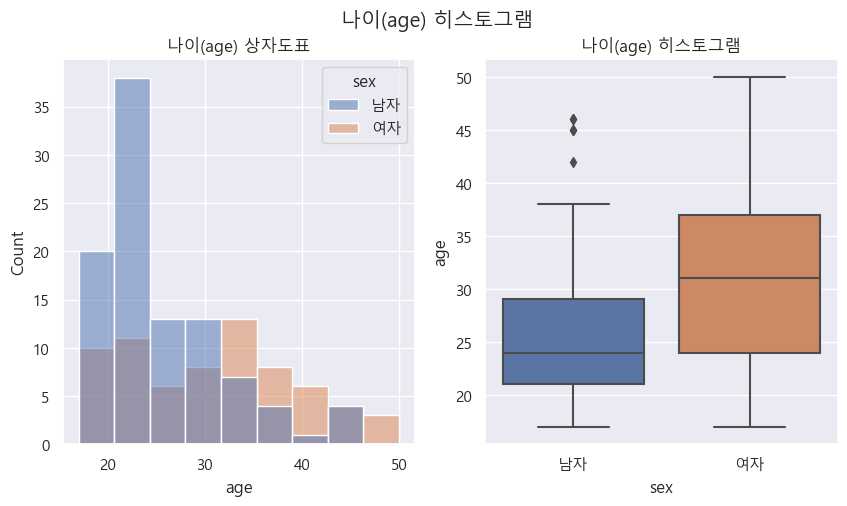

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("나이(age) 히스토그램")
sns.histplot(x = "age",
             hue = "sex",
             data = online_df,
             ax = ax[0])
ax[0].set(title = "나이(age) 상자도표")
sns.boxplot(x = "sex",
            y = "age",
            data = online_df,
            ax = ax[1])
ax[1].set(title = "나이(age) 히스토그램")
plt.show()

### Q5.Design과 Flow의 값 구하고, 산점도로 표시


In [24]:
num_feature = ['design', 'flow']
online_df[num_feature].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
design,169.0,0.02,1.00,-3.01,-0.52,0.03,0.67,2.56
flow,169.0,0.04,0.98,-3.29,-0.34,-0.18,0.75,2.61


In [25]:
num_feature = ['design', 'flow']
online_df[num_feature].agg(["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]).T.round(3)

,count,mean,std,min,max,median,skew,kurtosis
design,169.0,0.022,0.999,-3.007,2.561,0.034,-0.100,0.247
flow,169.0,0.038,0.978,-3.292,2.615,-0.175,-0.314,0.393


### Q6.성별에 따른 Design과 Flow의 값 구하고, 산점도로 표시

In [26]:
# 그룹별 분석
online_df.groupby('sex')[num_feature].mean().T.round(2)

sex,남자,여자
design,0.02,0.02
flow,0.13,-0.10


In [27]:
online_df.groupby('sex')[num_feature].describe().round(2)

design                                             flow                    \
     count  mean   std   min   25%   50%   75%   max  count  mean   std   min   
sex                                                                             
남자   100.0  0.02  1.03 -3.01 -0.60  0.01  0.73  2.55  100.0  0.13  1.01 -3.29   
여자    69.0  0.02  0.96 -2.49 -0.49  0.04  0.61  2.56   69.0 -0.10  0.93 -2.74   

                             
      25%   50%   75%   max  
sex                          
남자  -0.34  0.05  0.75  2.61  
여자  -0.64 -0.34  0.75  2.08

In [28]:
for num in num_feature:
    print("----", num, "----")
    results = online_df.groupby('sex')[num].describe().round(2)
    print(results, "\n")

---- design ----
     count  mean   std   min   25%   50%   75%   max
sex                                                 
남자   100.0  0.02  1.03 -3.01 -0.60  0.01  0.73  2.55
여자    69.0  0.02  0.96 -2.49 -0.49  0.04  0.61  2.56 

---- flow ----
     count  mean   std   min   25%   50%   75%   max
sex                                                 
남자   100.0  0.13  1.01 -3.29 -0.34  0.05  0.75  2.61
여자    69.0 -0.10  0.93 -2.74 -0.64 -0.34  0.75  2.08 



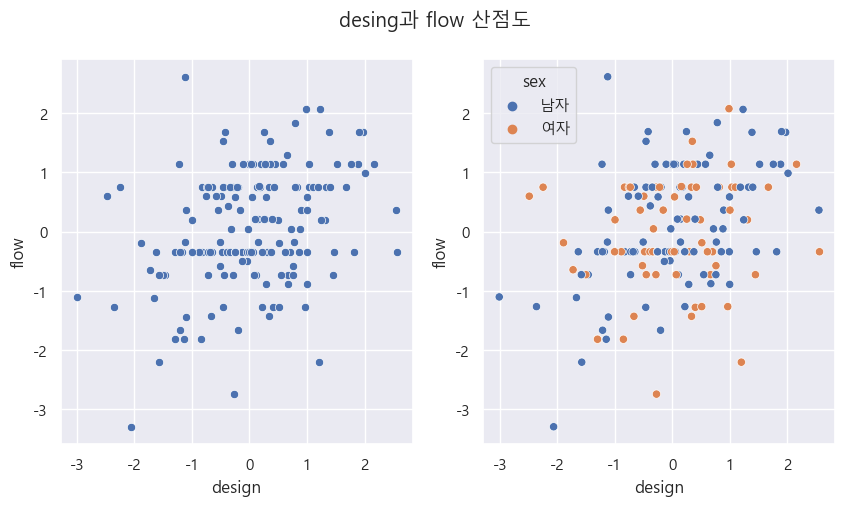

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("desing과 flow 산점도")
sns.scatterplot(x = "design",
                y = "flow",
                data = online_df,
                ax = ax[0])
sns.scatterplot(x = "design",
                y = "flow",
                hue = "sex",
                data = online_df,
                ax = ax[1])
plt.show()